# Pack Stats

In [1]:
#import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
packs_raw = pd.read_csv('./1.09/MEA_Patch_1_09.csv')
packs_raw.head()

,Date,Pack,AP/Creds,Price,Notes,Common (C/W),Uncommon (C/W),Rare Mod,Rare Weap.,Rare Char.,UR Weap.,UR Char.,1 Level booster,2 Level booster,3 Level booster,4 Level booster,N. Consumbales,Variant present,Ultra Rares
0,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,1,0,0,0,0,0,0,0,1,0,0,3,No,NaN
1,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,2,0,0,0,0,0,0,1,0,0,0,2,No,NaN
2,6-Jul-17,Advanced,Credits,20000,Bronze char unfin; Bronze mod variants unfin; ...,0,1,0,0,0,0,0,1,0,0,0,3,No,NaN
3,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,2,0,0,0,0,0,0,1,0,0,0,2,No,NaN
4,6-Jul-17,Basic,Credits,5000,Bronze char unfin; Bronze mod variants unfin; ...,1,0,0,0,0,0,0,1,0,0,0,3,No,NaN


In [3]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 19 columns):
Date               153 non-null object
Pack               153 non-null object
AP/Creds           153 non-null object
Price              153 non-null int64
Notes              153 non-null object
Common (C/W)       153 non-null int64
Uncommon (C/W)     153 non-null int64
Rare Mod           153 non-null int64
Rare Weap.         153 non-null int64
Rare Char.         153 non-null int64
UR Weap.           153 non-null int64
UR Char.           153 non-null int64
1 Level booster    153 non-null int64
2 Level booster    153 non-null int64
3 Level booster    153 non-null int64
4 Level booster    153 non-null int64
N. Consumbales     153 non-null int64
Variant present    153 non-null object
Ultra Rares        58 non-null object
dtypes: int64(13), object(6)
memory usage: 22.8+ KB


In [4]:
packs_raw_1_10 = pd.read_csv('./1.10/MEA_Patch_1_10.csv')

In [5]:
packs_raw_1_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 19 columns):
Date               335 non-null object
Pack               335 non-null object
AP/Creds           335 non-null object
Price              335 non-null int64
Notes              335 non-null object
Common (C/W)       335 non-null int64
Uncommon (C/W)     335 non-null int64
Rare Mod           335 non-null int64
Rare Weap.         335 non-null int64
Rare Char.         335 non-null int64
UR Weap.           335 non-null int64
UR Char.           335 non-null int64
1 Level booster    335 non-null int64
2 Level booster    335 non-null int64
3 Level booster    335 non-null int64
4 Level booster    335 non-null int64
N. Consumbales     335 non-null int64
Variant present    335 non-null object
Ultra Rares        130 non-null object
dtypes: int64(13), object(6)
memory usage: 49.8+ KB


In [6]:
packs_raw = packs_raw.append(packs_raw_1_10)

In [7]:
packs_raw['Notes'].value_counts()

Bronze mod variants unfin; Silver mod unfin; Silver mod variants unfin; Silver weap unfin; Silver weap variants unfin; Silver char unfin; Gold mod variants unfin; Gold weap unfin; Gold weap variants unfin; Gold char unfin; UR weap unfin; UR char unfin                       146
Bronze char unfin; Bronze mod variants unfin; Silver mod unfin; Silver mod variants unfin; Silver weap unfin; Silver weap variants unfin; Silver char unfin; Gold mod variants unfin; Gold weap unfin; Gold weap variants unfin; Gold char Unfin; UR weap unfin; UR char unfin    141
Bronze mod variants unfin; Silver mod variants unfin; Silver weap variants unfin; Gold mod variants unfin; Gold weap variants unfin; UR weap unfin; UR char unfin                                                                                                                 101
Bronze mod variants unfin; Silver mod unfin; Silver mod variants unfin; Silver weap unfin; Silver weap variants unfin; Silver char unfin; Gold mod variants unfin; Gol

In [8]:
packs_raw['Pack'].value_counts()

Reserves          140
Advanced          104
Jumbo Supply       48
Premium            47
Arsenal            43
Expert             32
Basic              31
Ammo Priming       25
Supply              9
Apex Elite          6
Technical Mods      2
Jumbo Premium       1
Name: Pack, dtype: int64

In [9]:
n_premium = 0
prem_types = ['Arsenal', 'Reserves', 'Premium']
for b in prem_types:
    n_premium += len(packs_raw[packs_raw['Pack'] == b])
print('Number of "premium tier" packs =', n_premium)

prem_idx = packs_raw['Pack'] == prem_types[0]
for i in range(1, len(prem_types)):
    prem_idx |= packs_raw['Pack'] == prem_types[i]

n_ur_weap = np.sum(packs_raw[prem_idx]['UR Weap.'])
print('Number of UR weapons =', n_ur_weap)

n_ur_char = np.sum(packs_raw[prem_idx]['UR Char.'])
print('Number of UR characters =', n_ur_char)

n_ur_tot = n_ur_weap + n_ur_char
print('Number of total URs =', n_ur_tot)

n_ur_boost = np.sum(packs_raw[prem_idx]['4 Level booster'])
print('Number of UR boosters =', n_ur_boost)

Number of "premium tier" packs = 230
Number of UR weapons = 22
Number of UR characters = 37
Number of total URs = 59
Number of UR boosters = 80


Suppose the probability of a UR character is twice that of a UR weapon over this mix of packs...

(array([   7.,   87.,  499.,  874., 2512., 3226., 1506., 1067.,  210.,
          12.]),
 array([25. , 27.7, 30.4, 33.1, 35.8, 38.5, 41.2, 43.9, 46.6, 49.3, 52. ]),
 <a list of 10 Patch objects>)

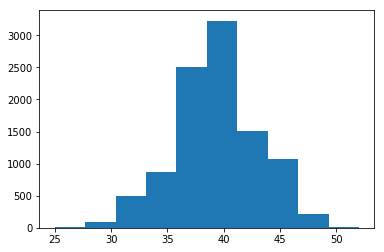

In [10]:
p_c = 0.666
p_w = 1.0 - p_c
C = stats.binom(n=n_ur_tot, p=p_c)
data = C.rvs(10000)
plt.hist(data)

In [11]:
n_ur_tot / n_premium

0.2565217391304348

In [20]:
print('Expert packs:')
n_expert = len(packs_raw[packs_raw['Pack'] == 'Expert'])
print(n_expert)

expert_idx = packs_raw['Pack'] == 'Expert'
print(np.sum(expert_idx))

n_ur_weap_ex = np.sum(packs_raw[expert_idx]['UR Weap.'])
print('Number of UR weapons =', n_ur_weap_ex)

n_ur_char_ex = np.sum(packs_raw[expert_idx]['UR Char.'])
print('Number of UR characters =', n_ur_char_ex)

n_ur_tot_ex = n_ur_weap_ex + n_ur_char_ex
print('Number of total URs =', n_ur_tot_ex)

n_ur_boost_ex = np.sum(packs_raw[expert_idx]['4 Level booster'])
print('Number of UR boosters =', n_ur_boost_ex)

print('UR fraction = %f' % (n_ur_tot_ex / n_expert))

Expert packs:
32
32
Number of UR weapons = 1
Number of UR characters = 2
Number of total URs = 3
Number of UR boosters = 6
UR fraction = 0.093750


In [33]:
cred_idx = packs_raw['AP/Creds'] == 'Credits'
print('number of credits purchases =', np.sum(cred_idx))

ap_idx = packs_raw['AP/Creds'] == 'AP'
print('number of AP purchases =', np.sum(ap_idx))

print('number of non-cred, non-AP packs =', np.sum(~ap_idx & ~cred_idx))

bonus_idx = packs_raw['AP/Creds'] == 'Bonus'
print('number of bonus packs =', np.sum(bonus_idx))

assert np.sum(cred_idx) + np.sum(ap_idx) + np.sum(bonus_idx) == len(packs_raw)

number of credits purchases = 361
number of AP purchases = 124
number of non-cred, non-AP packs = 3
number of bonus packs = 3


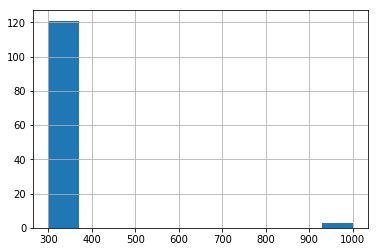

In [34]:
packs_raw['Price'][ap_idx].hist()

In [38]:
print('n 1000 APs = ', np.sum(packs_raw['Price'][ap_idx] == 1000))
print('n 300 APs = ', np.sum(packs_raw['Price'][ap_idx] == 300))

n 1000 APs =  3
n 300 APs =  121
